# 1. Importing the Libraries




In [299]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import joblib
from tkinter import *
import matplotlib.pyplot as plt

# 2. Importing Dataset 

In [300]:
data = pd.read_csv('heart.csv')

# 3. Taking care of Missing Values




In [301]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# 4. Taking care of Duplicate Values

In [302]:
data_dup = data.duplicated().any()

In [303]:
data_dup

True

In [304]:
data = data.drop_duplicates()

In [305]:
data_dup = data.duplicated().any()

In [306]:
data_dup

False

# 5. Data Processing

In [307]:
cate_val = [] # Columns which contains categorical values.
cont_val = [] # Columns which contains numerical values.

for column in data.columns :
  if data[column].nunique() <= 10 :
    cate_val.append(column)
  else :
    cont_val.append(column)

In [308]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [309]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# 6. Encoding Categorical Data

In [310]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [311]:
data['cp'].unique()

array([0, 1, 2, 3])

In [312]:
cate_val.remove("target")
cate_val.remove("sex")

# These colums are already contains 0's & 1's so no need of Encoding

data = pd.get_dummies(data, columns = cate_val, drop_first = True)

In [313]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# 7. Feature Scaling

In [314]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [315]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# 8. Splitting The Dataset Into Training Set and Test Set

In [316]:
X = data.drop("target", axis = 1)

In [317]:
Y = data["target"]

In [318]:
X_train , X_test, Y_train , Y_test = train_test_split(X,Y,test_size = 0.2, random_state=40)

In [319]:
X_train, Y_train

(          age  sex  trestbps      chol   thalach   oldpeak  cp_1  cp_2  cp_3  \
 75  -0.821493    1  0.364848  0.203222  0.281229 -0.899544     0     1     0   
 144 -0.821493    1 -1.117961 -0.822564 -0.287311 -0.813302     0     0     0   
 52  -1.817842    1  0.364848 -1.383842  1.024705 -0.899544     0     1     0   
 17  -0.046555    1 -0.433587  0.377412 -1.774263  0.997780     0     0     0   
 58   1.392616    1  1.163283 -0.667728  0.018826 -0.209608     0     1     0   
 ..        ...  ...       ...       ...       ...       ...   ...   ...   ...   
 512 -1.153610    1 -1.117961  0.841918  0.150027 -0.899544     0     0     0   
 274  1.281911    1  1.619532 -0.358057 -0.505981  1.084022     0     0     0   
 218 -0.932199    1  0.478910  1.248361 -1.293190  0.652812     0     0     0   
 7    0.064151    1  1.619532  0.822564 -0.199843 -0.209608     0     0     0   
 331  0.949794    0 -1.346085  0.435475  0.849769  0.652812     0     0     0   
 
      fbs_1  ...  exang_1 

In [320]:
X_test, Y_test

(          age  sex  trestbps      chol   thalach   oldpeak  cp_1  cp_2  cp_3  \
 19   0.396267    1  0.478910 -0.687083  0.674834 -0.899544     0     1     0   
 137  1.060500    0  2.760154  1.519323  0.193761 -0.899544     0     0     0   
 119 -1.375021    1 -0.661712  0.938690  0.543632 -0.899544     1     0     0   
 361  0.839089    1 -0.091401 -0.299994 -0.156110  0.652812     0     1     0   
 106 -0.378671    1  0.478910  1.016108  1.024705  0.480328     0     0     0   
 ..        ...  ...       ...       ...       ...       ...   ...   ...   ...   
 628  1.614027    0  0.478910 -0.145158  0.062560  0.652812     0     0     1   
 182  0.617678    1  0.478910  0.899981  0.893503  0.135360     0     0     0   
 450  0.949794    0  1.049221  3.106387  0.193761  2.550136     0     0     0   
 224 -0.378671    1  0.478910  0.280639  1.593245 -0.899544     0     0     0   
 104 -0.267966    1 -0.775774 -1.170944  1.768180 -0.899544     0     0     1   
 
      fbs_1  ...  exang_1 

# 9. Logistic Regression

In [321]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [322]:
log = LogisticRegression()
log.fit(X_train, Y_train)

LogisticRegression()

In [323]:
y_pred1 = log.predict(X_test)

In [324]:
accuracy_score(Y_test, y_pred1)

0.9508196721311475

# 10. SVC (Support Vector Classifier)

In [325]:
svm = svm.SVC()

In [326]:
svm.fit(X_train, Y_train)

SVC()

In [327]:
y_pred2 = svm.predict(X_test)
accuracy_score(Y_test, y_pred2)

0.8688524590163934

# 11. KNeighbors Classifier

In [328]:
knn = KNeighborsClassifier()

In [329]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [330]:
y_pred3 = knn.predict(X_test)

In [331]:
accuracy_score(Y_test, y_pred3)

0.819672131147541

In [332]:
score = []

for k in range(1,49) :
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, Y_train)
  y_pred = knn.predict(X_test)
  score.append(accuracy_score(Y_test, y_pred))

In [333]:
score

[0.8032786885245902,
 0.8688524590163934,
 0.7868852459016393,
 0.7704918032786885,
 0.819672131147541,
 0.8032786885245902,
 0.8524590163934426,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.8032786885245902,
 0.819672131147541,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.819672131147541,
 0.819672131147541,
 0.8032786885245902,
 0.819672131147541,
 0.819672131147541,
 0.7868852459016393,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.8360655737704918,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393]

<function matplotlib.pyplot.show>

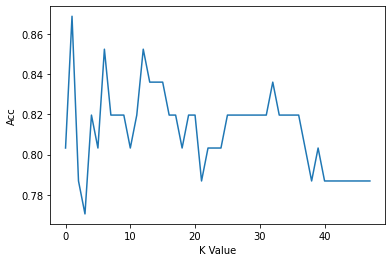

In [334]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show

In [335]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
accuracy_score(Y_test, y_pred)

0.8688524590163934

# Non-Linear ML Algorithms

In [336]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [337]:
data = data.drop_duplicates()
data.shape

(302, 14)

In [338]:
X = data.drop('target', axis = 1)
Y = data['target']

In [339]:
X_train , X_test, Y_train , Y_test = train_test_split(X,Y,test_size = 0.2, random_state=42)

# 12. Decision Tree Classifier

In [340]:
dt = DecisionTreeClassifier()

In [341]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [342]:
y_pred4 = dt.predict(X_test)

In [343]:
accuracy_score(Y_test, y_pred4)

0.7213114754098361

# 13. Random Forest Classifier

In [344]:
rf = RandomForestClassifier()

In [345]:
rf.fit(X_test, Y_test)

RandomForestClassifier()

In [346]:
y_pred5 = rf.predict(X_test)

In [347]:
accuracy_score(Y_test, y_pred5)

1.0

# 14. Gradient Boosting Classifier

In [348]:
gbc = GradientBoostingClassifier()

In [349]:
gbc.fit(X_train, Y_train)

GradientBoostingClassifier()

In [350]:
y_pred6 = gbc.predict(X_test)

In [351]:
accuracy_score(Y_test, y_pred6)

0.8032786885245902

In [352]:
final_data = pd.DataFrame({'Models': ['LR','SVM','KNN','DT','RF','GB'],
                           'ACC':[accuracy_score(Y_test, y_pred1)*100,
                                  accuracy_score(Y_test, y_pred2)*100,
                                  accuracy_score(Y_test, y_pred3)*100,
                                  accuracy_score(Y_test, y_pred4)*100,
                                  accuracy_score(Y_test, y_pred5)*100,
                                  accuracy_score(Y_test, y_pred6)*100]})

final_data

,Models,ACC
0,LR,59.016393
1,SVM,57.377049
2,KNN,59.016393
3,DT,72.131148
4,RF,100.000000
5,GB,80.327869


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


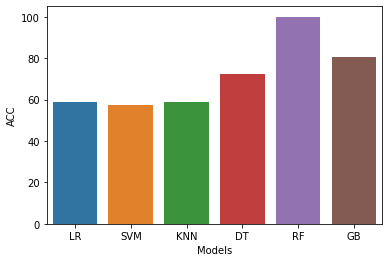

In [353]:
sns.barplot(final_data['Models'], final_data['ACC'])

#### So Random Forest model gives a good accuracy so it is best model

In [354]:
X = data.drop("target", axis=1)
Y = data['target']

In [355]:
X.shape

(302, 13)

In [356]:
rf = RandomForestClassifier()
rf.fit(X,Y)

RandomForestClassifier()

# 15. Prediction on New Data

In [357]:
new_data = pd.DataFrame({
    'age': 52,
    'sex' : 1,
    'cp' : 0,
    'trestbps' : 125,
    'chol' : 212,
    'fbs' : 0,
    'restecg' : 1,
    'thalach' : 168,
    'exang' : 0,
    'oldpeak' : 1.0,
    'slope' : 2,
    'ca' : 2,
    'thal' : 3,
}, index=[0])

new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [358]:
p = rf.predict(new_data)
if p[0] == 0:
  print("No Disease")
else :
  print("Suffering from Disease")

No Disease


# 16. Save Model Using Joblib

In [359]:
joblib.dump(rf, 'model_joblib_heart')

['model_joblib_heart']

In [360]:
model = joblib.load('model_joblib_heart')

In [361]:
model.predict(new_data)

array([0])

# GUI

In [363]:
import sys
import os

if os.environ.get('DISPLAY','') == '':
    print('no display found. Using :0.0')
    os.environ.__setitem__('DISPLAY', ':0.0')

def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)


master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

TclError: ignored